<a href="https://colab.research.google.com/github/VinodKumar9576/TIPS/blob/master/Tips/Correlations 08 05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You can refer the original post in the below link<br>
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

**Introduction**

* There may be complex and unknown relationships between the features in the dataset.
* It is most important to quantify these relations and find which features are dependent upon each other.
* With the presence of these features algorithms like ***linear regression's*** performance will degrade.

**What is Correlation?**

* Features will be realated to one another for many reasons.
  * One feature could cause another feature.
  * One feature could depend on values of another feature.
  * One could be lightly associated with another feature.
  * Two features could depend on third unknown feature.
* The statistical relation between two variables is called ***correlation***.
* `Corr` can be +ve, -ve, 0.
  * **+ve** - Higly correlated.
  * **-ve** - Very less related
  * **0** - Not related at all
* Performance of algo degrade when two or more features are tightly correlated **(Multicollinearity)**.
* In order to improve the skill of the model, example for linear regression, one of the offending correlated features **should be removed**.
* The structure of the relationship b/w features can be **linear** or can be any structure. If the plot is completely scatter then there are more chances of -ve correlation.
* Based on the relationship and the distribution of features, different correlation scores can be calculated.

**Dataset**

* In this post, we'll look at 3 kinds of data
  * Data having Gaussian distribution
  * Data having Linear relationship
  * Data that doesn't asume any distribution but will have any monotonic (inc/dec) relation.

* 1000 samples of two variables with strong correlation.
* **First feature** : random numbers drawn from a Gaussian distribution with $\mu$=100 and $\sigma$ = 20.
* **Second feature** : values drawn from first variable with Gaussian noise added with $\mu$ = 50 and $\sigma$ = 10.

data1 : mean = 100.776 std = 19.62
data2 : mean = 151.05 std = 22.358


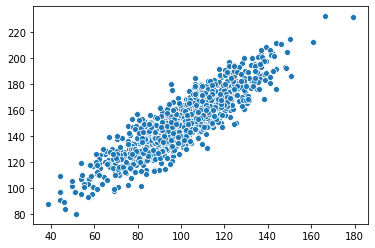

In [ ]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
import seaborn as sns
import matplotlib.pyplot as plt
seed(1)

#data preparation
data1 = 20*randn(1000) + 100
data2 = data1 + (10*randn(1000)+50)

#summarize
print(f'data1 : mean = {round(np.mean(data1),3)} std = {round(np.std(data1),3)}')
print(f'data2 : mean = {round(np.mean(data2),3)} std = {round(np.std(data2),3)}')

#plotting
sns.scatterplot(x=data1, y=data2)
plt.show()

**CoVariance**

* The relationshipm b/w two variables can be summarized using **CoVariance**.
  
> **cov(X, Y) = $\frac{1}{(n-1)}$  $\sum$(x-$\mu$(X))  (y-$\mu$(Y))**

* Having mean($\mu$) in covariance says that each data sample to have Gaussian or Gaussian like distribution.
* **+ve** cov : both variables change in same direction.
* **-ve** cov : opposite direction.
* **0** cov : Variables are independent.
* Magnitude is hard to interpret.
* The diagonal of the calculated covariance matrix contains cov b/w each var and itself.

In [ ]:
from numpy.random import randn
from numpy.random import seed
from numpy import cov
seed(1)

data1 = 20*randn(1000)+100
data2 = data1 + (10*randn(1000)+50)

covariance = cov(data1,data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


* Covariance is used widely in statistics and multivariate analysis to know the relationships b/w two or more variables.
* Only drawback with covariance is, it's hard to interpret. This lead to the Pearson's correlation coefficient.

**Pearson's Correlation**

* Used to summarize the strength of **linear relationship** b/w two data samples.
* Is the covariance of two variables divided by product of std.
* It is the normalization of the covariance between two variables.
> **Pearson's corr = $\frac{cov(X,Y)}{\sigma(X)\;*\;\sigma(Y)}$**
* $\sigma, \mu$ in above equation suggests that two data samples to have Gaussian or Gaussian-like distribution.
* Coefficient returns value in range [-1,1].
* Value 0 represents no correlation at all.
* Value < -0.5 or above 0.5 - notable correlation and below those denotes less correlation.
<br>

* Calculated using scipy.stats pearsonr
* above returns ***corr*** as well as ***p-value*** whose null hypothesis is that two sets of data aer uncorrelated.

In [ ]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
seed(1)

#data preparation
data1 = 20*randn(1000) + 100
data2 = data1 + (10*randn(1000)+50)

#correlation
corr, p_val = pearsonr(data1, data2)
print('Pearsons correaltion : %.3f'%corr)
print('p-value: ', p_val)

Pearsons correaltion : 0.888
p-value:  0.0


* We can see from above two variables are positively correlated with magnitude 0.8 which suggests a high correlation.

**Spearman's Correlation**

* Used when two variables are related by **non-linear relationship**, such that the relationship is stronger or weaker across the distribution of the variables.
* Also two variables taken into account may not have Gaussian distribution.
* This can also be used, if the variables have **linear relationship** but end up with lower coefficient scores.
* Range of values : [-1, 1]
* In above two approaches, we calculated covariance, standard deviation on the samples themselves but in Spearman's corr these are calculated from **relative rank** of values on each sample.
* Approach said in above point is common in non-parametric statistics eg: statistical methods where we do not assume a distribution of the data such as Gaussian.
> **Spearman's corr = $\frac{cov(rank(X),\;rank(Y))}{\sigma(rank(X))\;*\;\sigma(rank(Y))}$**
* A linear relation b/w variables is not assumed, although a monotonic realtionship is assumed.
* If we are unsure of ditribution and possible relationships b/w two variables, Spearman's corr is good one to use.
<br>

* Calculated using scipy.stats spearmanr
* above returns ***corr*** as well as ***p-value*** whose null hypothesis is that two sets of data aer uncorrelated.

In [ ]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
seed(1)

data1 = 20*randn(1000)+100
data2 = data1+(10*randn(1000)+50)

#correlation
corr, p_val = spearmanr(data1, data2)
print('Spearmans correlation : %0.3f' %corr)
print('p-value: ', p_val)

Spearmans correlation : 0.872
p-value:  1.58425746359e-312
